# A simple neural network implemented by using only numpy
<img src='images/neural-network.png'>

### Create dummy data

In [36]:
from sklearn.datasets import make_regression

n_samples = 100

data = make_regression(n_samples=n_samples, n_features=2)
x = data[0]
y = np.expand_dims(data[1], axis=1)

print('x', x.shape)
print('y', y.shape)

x (100, 2)
y (100, 1)


### Plot the generated data

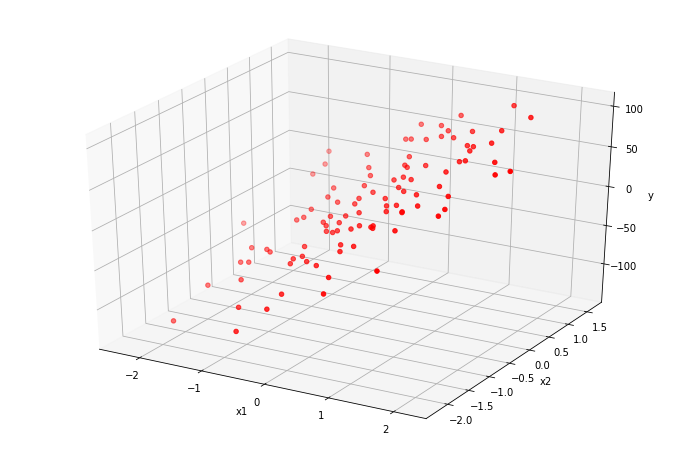

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y[:,0], c=c)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

### Split data in three data sets: training, validation and test

In [37]:
train_index = int(n_samples * 0.7)
validation_index = int(n_samples * 0.8)

x_train, y_train = x[:train_index], y[:train_index]
x_valid, y_valid = x[train_index:validation_index], y[train_index:validation_index]
x_test, y_test = x[validation_index:], y[validation_index:]

In [38]:
print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid', 'y_valid', x_valid.shape, y_valid.shape)
print('x_test', 'y_test', x_test.shape, y_test.shape)

x_train, y_train (70, 2) (70, 1)
x_valid y_valid (10, 2) (10, 1)
x_test y_test (20, 2) (20, 1)


### Create the network

In [299]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # set random seed
        np.random.seed(42)
        
        # initialize weights matrix W1 (from input layer to hidden layer)
        self.W1 = 2 * np.random.random((2, 3)) - 1
        
        # initialize weights matrix W2 (from hidden layer to output layer)
        self.W2 = 2 * np.random.random((3, 1)) - 1
        
    # sigmoid activation function for the hidden layer
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    # derivative of the sigmoid function
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def mean_square(self, target, output):
        return sum((target - output)**2) / len(target)

    # feed forward
    def feed_forward(self, x):
        # from input to hidden layer
        hidden_input = np.dot(x, self.W1)
        # hidden layer uses the sigmoid as an activation function
        hidden_output = self.__sigmoid(hidden_input)
        
        # save the hidden state for the backpropagation step
        self.h = hidden_output
        
        # from hidden layer to output
        output = np.dot(hidden_output, self.W2)
        
        return output
    
    # train
    def train(self, x_train, y_train, x_valid, y_valid, epochs=1200, learning_rate=0.001):
        for epoch in range(epochs):
            # one element at a time
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]
                
                # feed forward
                output = self.feed_forward(x)

                # error
                error = y - output

                # graditent for W2
                W2_gradient = self.h

                # W2 delta
                W2_delta = learning_rate * error * np.expand_dims(W2_gradient, axis=1)

                # gradient for W1: W2 * sigmoid'(h) * x
                W1_gradient = self.W2.T * self.__sigmoid_derivative(self.h)
                W1_gradient = W1_gradient * np.expand_dims(x, axis=1)

                # W1 delta
                W1_delta = learning_rate * error * W1_gradient
            
                # Adjust weight matrices
                self.W2 = self.W2 + W2_delta
                self.W1 = self.W1 + W1_delta
    
            if epoch % 100 == 0:
                validation_output = self.feed_forward(x_valid)
                print('epoch', epoch, 'MSE', self.mean_square(y_valid, validation_output))

### Train the network

In [300]:
# initialize the network
nn = NeuralNetwork()

nn.train(x_train, y_train, x_valid, y_valid)

epoch 0 MSE [ 2434.00235735]
epoch 100 MSE [ 78.48880208]
epoch 200 MSE [ 35.80693394]
epoch 300 MSE [ 26.39841436]
epoch 400 MSE [ 18.99215925]
epoch 500 MSE [ 27.07925847]
epoch 600 MSE [ 25.86848376]
epoch 700 MSE [ 24.81037839]
epoch 800 MSE [ 23.69603231]
epoch 900 MSE [ 22.55707179]
epoch 1000 MSE [ 21.85073879]
epoch 1100 MSE [ 21.59660019]


#### Test the network

In [301]:
output = nn.feed_forward(x_test)
mean_square = nn.mean_square(y_test, output)
print(mean_square)

[ 18.46003956]


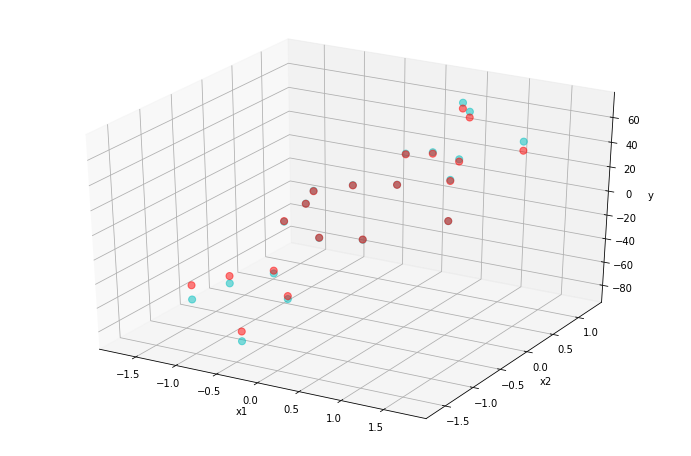

In [328]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test[:,0], x_test[:,1], y_test[:,0], s=50, c='c', alpha=0.5)
ax.scatter(x_test[:,0], x_test[:,1], output[:,0], s=50, c='r', alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()